Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [103]:
# Import CSV Files
station_POI = pd.read_csv('/Users/mitchellpalmer/Projects/Lighthouse Lab Projects/Data_Statistical_Modeling/Statistical_Modeling_Project/Statistical-Modelling-Project./data/FOURSQUARE_Lisbon_Station_Surroundings.csv')

lb_citybikes = pd.read_csv('/Users/mitchellpalmer/Projects/Lighthouse Lab Projects/Data_Statistical_Modeling/Statistical_Modeling_Project/Statistical-Modelling-Project./data/lisbon_bike_station_df.csv')

In [104]:
# View descriptive statistics of Citybike Stations
lb_citybikes.describe()

,latitude,longitude,free bikes,empty slots,total slots,station_id
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,38.741705,-9.148699,5.579487,14.389744,19.969231,97.000000
std,0.022466,0.027642,5.792600,8.440324,7.675042,56.435804
min,38.693500,-9.226569,0.000000,0.000000,10.000000,0.000000
25%,38.727779,-9.161227,1.500000,8.000000,14.000000,48.500000
50%,38.742574,-9.147930,4.000000,14.000000,19.000000,97.000000
75%,38.759465,-9.135863,8.000000,18.000000,23.000000,145.500000
max,38.793000,-9.092350,35.000000,42.000000,43.000000,194.000000


In [105]:
lb_citybikes.head()

,latitude,longitude,timestamp,free bikes,empty slots,total slots,station_id
0,38.753590,-9.157170,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0
1,38.752310,-9.158850,2025-07-26T23:39:44.571444+00:00Z,0,23,23,1
2,38.770657,-9.160248,2025-07-26T23:39:44.570809+00:00Z,7,26,33,2
3,38.780690,-9.096220,2025-07-26T23:39:44.570706+00:00Z,8,6,14,3
4,38.702936,-9.175234,2025-07-26T23:39:44.571010+00:00Z,6,17,23,4


In [106]:
# View descriptive statistics of Points_Of_Interest 
station_POI.describe()

,rating,popularity,distance,veracity,station_id
count,8038.000000,9662.000000,9662.000000,9662.000000,9662.000000
mean,7.711869,0.826588,418.429932,4.080832,96.477127
std,0.799174,0.249377,210.194225,0.912703,56.214922
min,4.400000,0.001017,7.000000,1.000000,0.000000
25%,7.200000,0.864818,263.000000,4.000000,48.000000
50%,7.700000,0.934020,399.000000,4.000000,96.000000
75%,8.300000,0.971779,557.000000,5.000000,145.000000
max,9.600000,1.000000,999.000000,5.000000,194.000000


In [107]:
station_POI

,name,rating,total num ratings,popularity,distance,veracity,category,station_id
0,Torre Do Tombo,8.4,21,0.943785,124,4,"Government Building, Library",0
1,Aula Magna,8.5,127,0.986900,138,4,Concert Hall,0
2,Alameda da Universidade,7.9,47,0.937355,121,4,"Plaza, Garden",0
3,Letras Bar,6.2,11,0.659332,87,3,Portuguese Restaurant,0
4,Horto do Campo Grande,8.2,40,0.959301,337,5,Flower Store,0
...,...,...,...,...,...,...,...,...
9657,Pastelaria Florida,5.6,12,0.953423,257,4,Coffee Shop,194
9658,Continente Bom Dia Acqua Roma,7.6,17,0.888488,506,5,"Supermarket, Bakery",194
9659,Café Império,7.4,255,0.971016,502,5,Portuguese Restaurant,194
9660,Quiosque da Alameda,6.6,26,0.968459,404,5,"Café, Cafeteria",194


In [108]:
# Merge DataFrame by BikeStation_ID
bikestations_POI = pd.merge(lb_citybikes,station_POI,on='station_id',how='inner')

bikestations_POI.head()

,latitude,longitude,timestamp,free bikes,empty slots,total slots,station_id,name,rating,total num ratings,popularity,distance,veracity,category
0,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Torre Do Tombo,8.4,21,0.943785,124,4,"Government Building, Library"
1,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Aula Magna,8.5,127,0.986900,138,4,Concert Hall
2,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Alameda da Universidade,7.9,47,0.937355,121,4,"Plaza, Garden"
3,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Letras Bar,6.2,11,0.659332,87,3,Portuguese Restaurant
4,38.75359,-9.15717,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0,Horto do Campo Grande,8.2,40,0.959301,337,5,Flower Store


In [109]:
# Observe data types and begin cleaning where necessary
bikestations_POI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9662 entries, 0 to 9661
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           9662 non-null   float64
 1   longitude          9662 non-null   float64
 2   timestamp          9662 non-null   object 
 3   free bikes         9662 non-null   int64  
 4   empty slots        9662 non-null   int64  
 5   total slots        9662 non-null   int64  
 6   station_id         9662 non-null   int64  
 7   name               9662 non-null   object 
 8   rating             8038 non-null   float64
 9   total num ratings  9662 non-null   object 
 10  popularity         9662 non-null   float64
 11  distance           9662 non-null   int64  
 12  veracity           9662 non-null   int64  
 13  category           9644 non-null   object 
dtypes: float64(4), int64(6), object(4)
memory usage: 1.0+ MB


In [110]:
# Total Number Of Ratings has object '{}' values
print(bikestations_POI['total num ratings'].dtype)
print(bikestations_POI['total num ratings'].head(10))

object
0     21
1    127
2     47
3     11
4     40
5    351
6    199
7     {}
8     10
9     63
Name: total num ratings, dtype: object


In [111]:
# Clean Total Number Of Ratings column into Numeric Dtype

# AI Assistance
bikestations_POI['total num ratings'] = pd.to_numeric(
    bikestations_POI['total num ratings']
        .astype(str)
        .str.replace(r'[{}]', '', regex=True)
        .str.strip(), 
    errors='coerce'    
)

print(bikestations_POI['total num ratings'].dtype)
print(bikestations_POI['total num ratings'].head(10))

float64
0     21.0
1    127.0
2     47.0
3     11.0
4     40.0
5    351.0
6    199.0
7      NaN
8     10.0
9     63.0
Name: total num ratings, dtype: float64


In [112]:
bikestations_POI.value_counts('category').head(5)

category
Portuguese Restaurant    945
Restaurant               577
Café                     495
Bakery                   303
Coffee Shop              171
Name: count, dtype: int64

In [113]:
# Recreate category filters for top 5 category types + bar

# Filter masks for categories values
restaurant_mask = bikestations_POI['category'].str.contains('Restaurant', case=False, na=False)
bar_mask = bikestations_POI['category'].str.contains('Bar', case=False, na=False)
cafe_mask = bikestations_POI['category'].str.contains('Café', case=False, na=False)
bakery_mask = bikestations_POI['category'].str.contains('Bakery', case=False, na=False)
coffee_mask = bikestations_POI['category'].str.contains('Coffee', case=False, na=False)

# Create Series for each mask-filter
restaurant_counts = bikestations_POI[restaurant_mask].groupby('station_id').size().rename('restaurant_count')
bar_counts = bikestations_POI[bar_mask].groupby('station_id').size().rename('bar_count')
cafe_counts = bikestations_POI[cafe_mask].groupby('station_id').size().rename('cafe_counts')
bakery_counts = bikestations_POI[bakery_mask].groupby('station_id').size().rename('bakery_counts')
coffee_counts = bikestations_POI[coffee_mask].groupby('station_id').size().rename('coffee_counts')


# Concatenate Series into Dataframe 
categories_counts = pd.concat([restaurant_counts, bar_counts,cafe_counts,bakery_counts,coffee_counts], axis=1).fillna(0).astype(int)
categories_counts.reset_index(inplace=True)

# Observe category values for each bike_station
categories_counts

,station_id,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts
0,0,18,1,8,2,2
1,1,18,1,6,0,2
2,2,18,0,4,4,1
3,3,12,1,4,2,3
4,4,21,3,4,2,1
...,...,...,...,...,...,...
190,190,17,4,3,3,1
191,191,13,0,1,1,2
192,192,24,3,3,2,1
193,193,17,9,2,2,2


In [114]:
# Create new Dataframe observing ratings of locations nearby each bike_station
EDA_bikestations = bikestations_POI.groupby(['station_id', 'free bikes','empty slots','total slots']).agg({
    'rating': 'mean',
    'total num ratings': 'sum',
    'popularity': 'mean'
}).reset_index()




In [115]:
# Concatenate Ratings_DF and Categories_DF for further analysis
EDA_bikestations = pd.merge(EDA_bikestations, categories_counts,on='station_id',how='inner')

EDA_bikestations.rename(columns={
    'total slots':'total bike slots',
    'rating':'average rating',
    'total num ratings':'total ratings',
    'popularity':'average popularity'
    },
    inplace=True)

EDA_bikestations

,station_id,free bikes,empty slots,total bike slots,average rating,total ratings,average popularity,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts
0,0,0,32,32,7.585366,2772.0,0.823715,18,1,8,2,2
1,1,0,23,23,7.744444,1808.0,0.750702,18,1,6,0,2
2,2,7,26,33,7.354545,1134.0,0.807498,18,0,4,4,1
3,3,8,6,14,7.709375,1669.0,0.807738,12,1,4,2,3
4,4,6,17,23,7.516000,6061.0,0.777604,21,3,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,12,18,30,7.988000,7211.0,0.872005,17,4,3,3,1
191,191,1,40,41,7.706250,774.0,0.730178,13,0,1,1,2
192,192,0,17,17,7.446341,3428.0,0.769418,24,3,3,2,1
193,193,16,4,20,8.192000,13673.0,0.940997,17,9,2,2,2


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

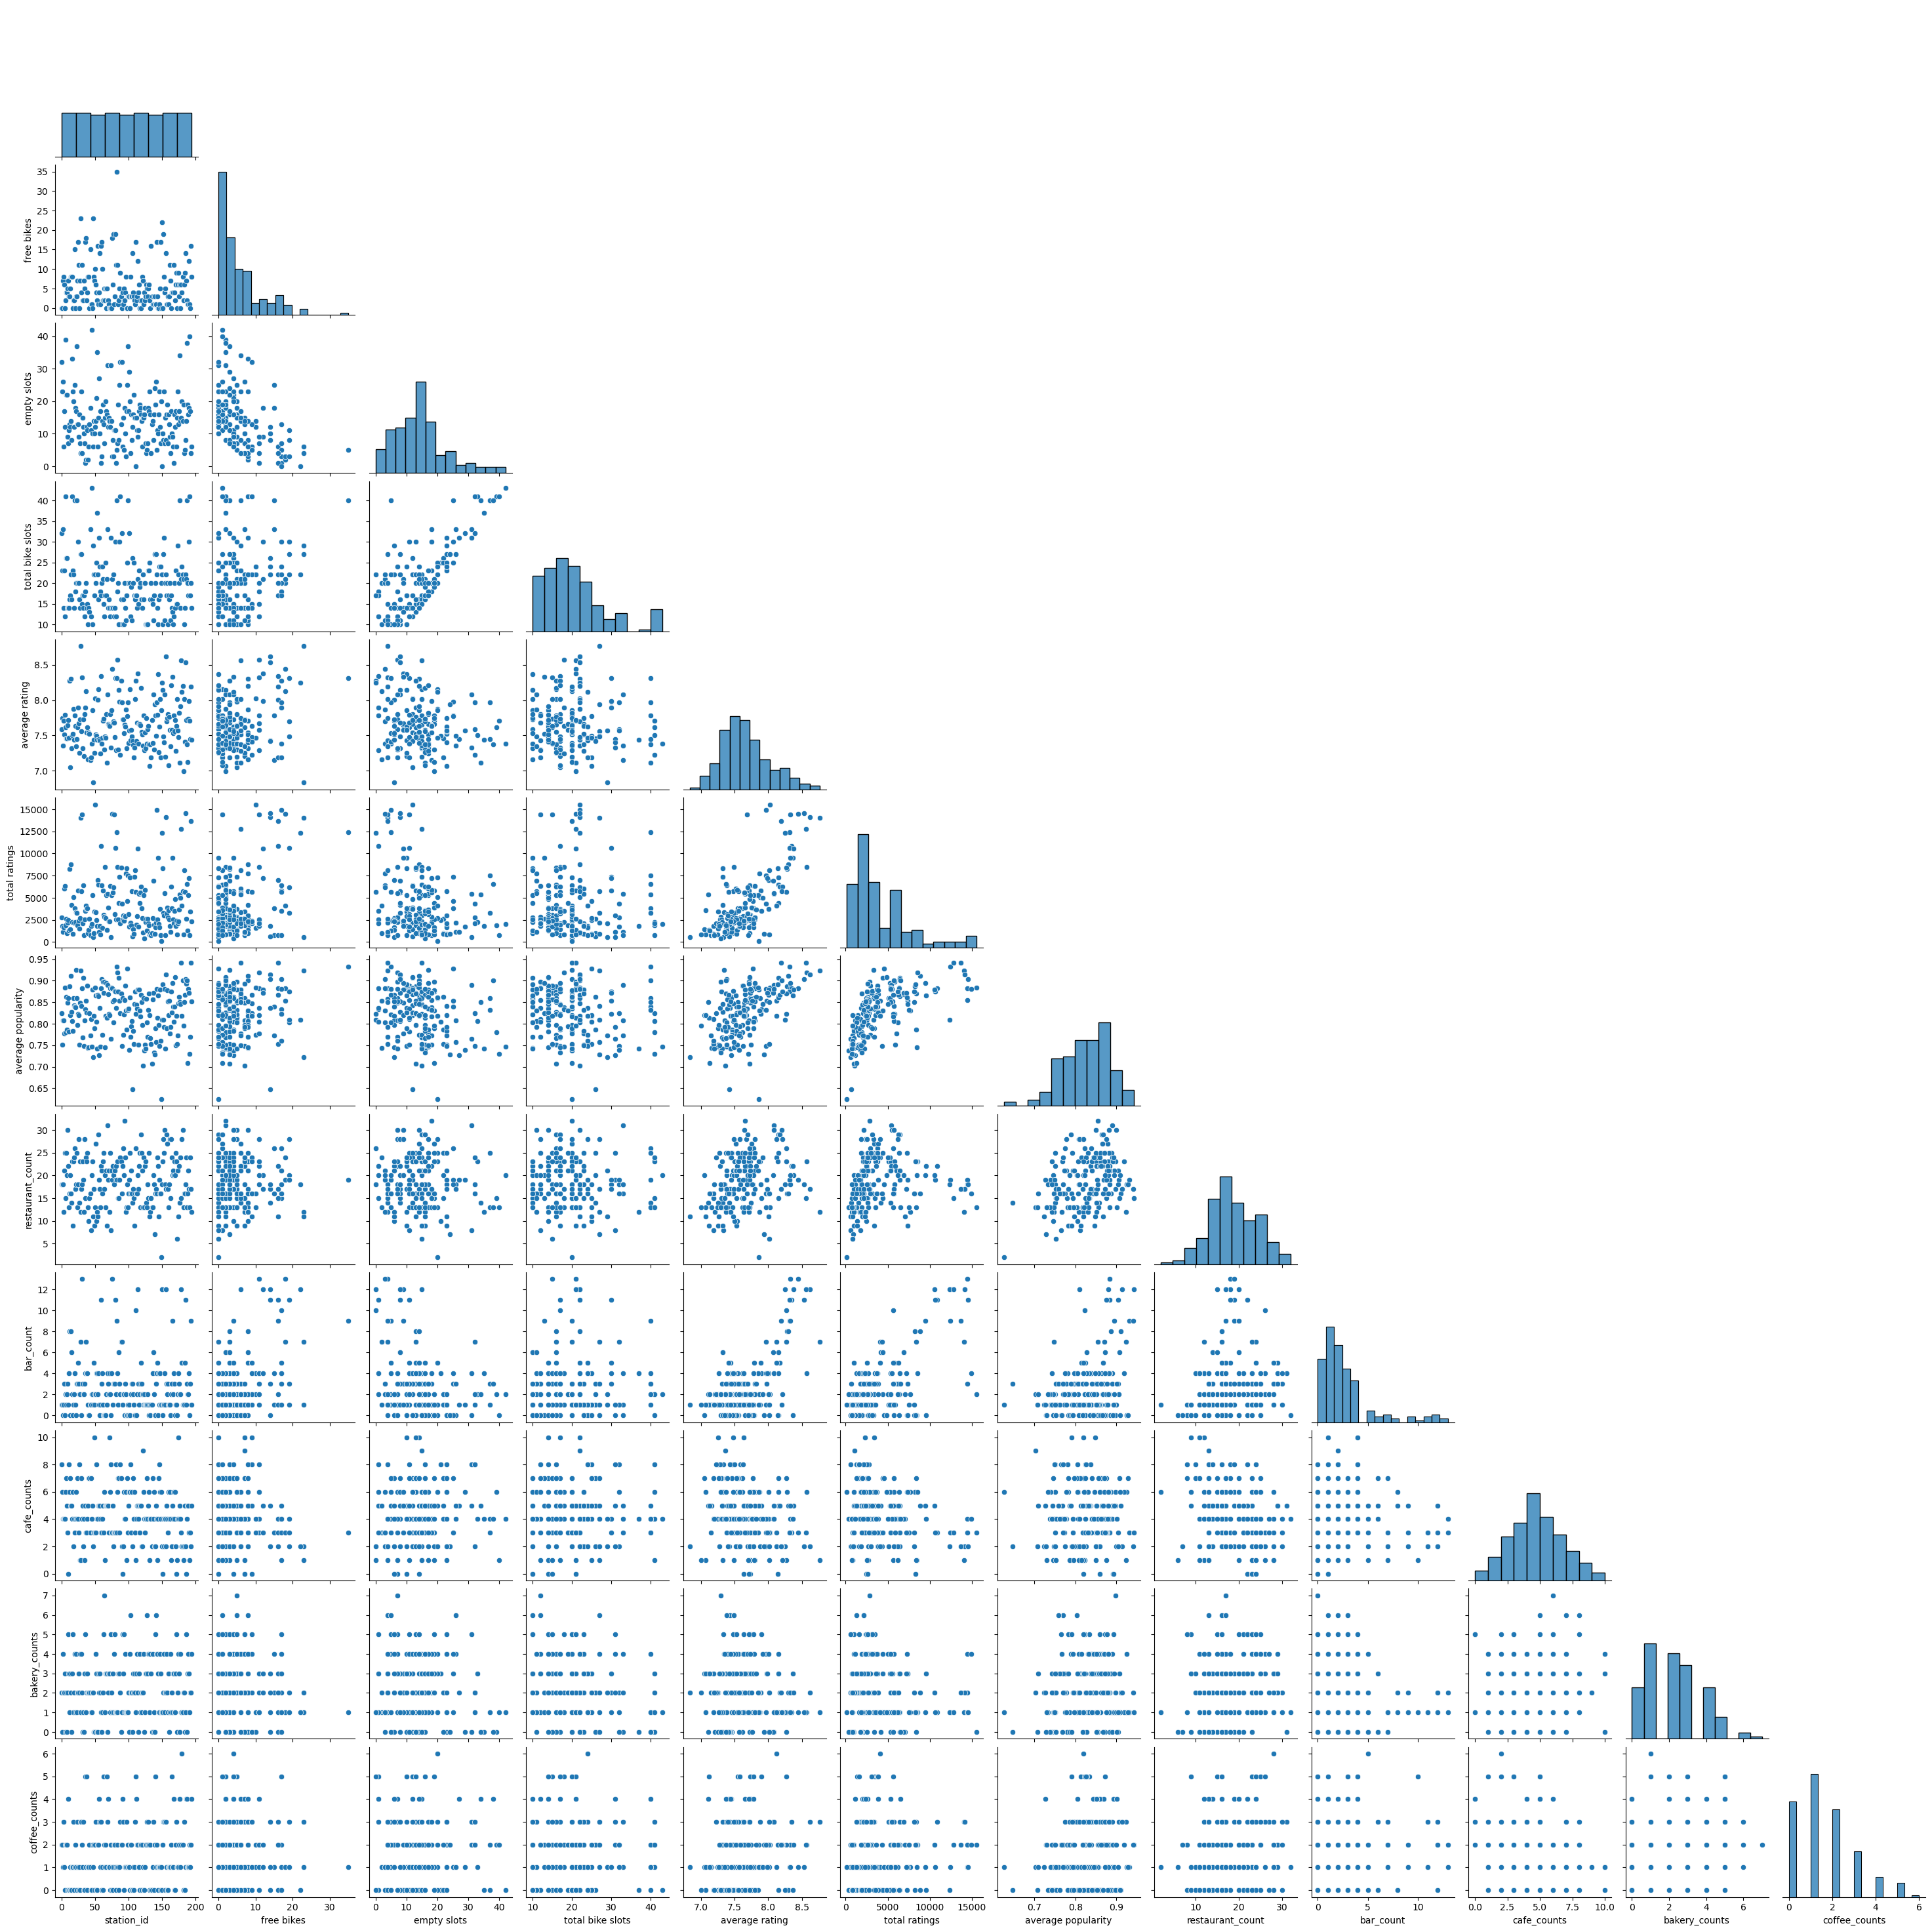

In [116]:
# CityBike Data relationships with FOURSQUARE Points_Of_Interest In Lisbon City, Portugal

# Seaborn's Pairplot
sns.pairplot(EDA_bikestations,corner=True)
plt.show()

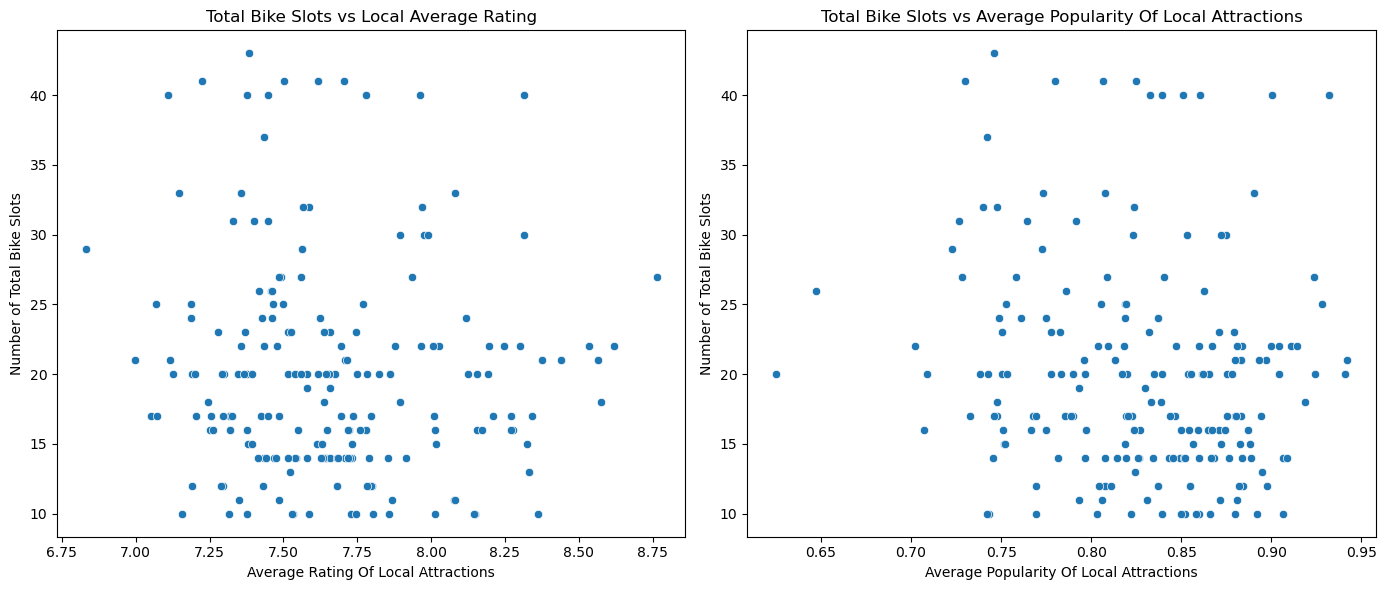

In [148]:
totalbikes_local_ratings, axes = plt.subplots(nrows = 1, ncols=2, figsize=(14,6))

# Total Bikes Vs Average Local Ratings
sns.scatterplot(
    data=EDA_bikestations,
    x='average rating',
    y='total bike slots',
    ax=axes[0]
)
axes[0].set_title('Total Bike Slots vs Local Average Rating')
axes[0].set_xlabel("Average Rating Of Local Attractions")
axes[0].set_ylabel("Number of Total Bike Slots")

# Total Bikes Vs Total Number Of Local Ratings
sns.scatterplot(
    data=EDA_bikestations,
    x='average popularity',
    y='total bike slots',
    ax=axes[1]
)
axes[1].set_title('Total Bike Slots vs Average Popularity Of Local Attractions')
axes[1].set_xlabel("Average Popularity Of Local Attractions")
axes[1].set_ylabel("Number of Total Bike Slots")


plt.tight_layout()
totalbikes_rating_fig = totalbikes_local_ratings


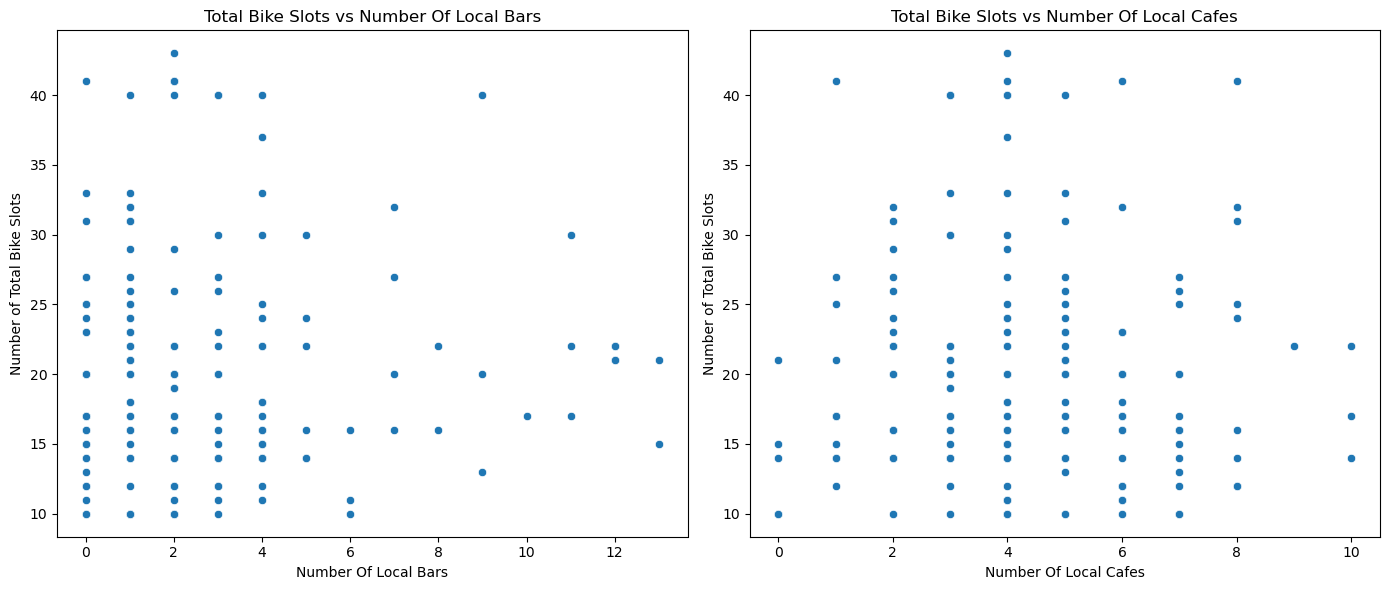

In [150]:
emptyslots_local_ratings, axes = plt.subplots(nrows = 1, ncols=2, figsize=(14,6))

# Total Bikes Vs Average Local Ratings
sns.scatterplot(
    data=EDA_bikestations,
    x='bar_count',
    y='total bike slots',
    ax=axes[0]
)
axes[0].set_title('Total Bike Slots vs Number Of Local Bars')
axes[0].set_xlabel("Number Of Local Bars")
axes[0].set_ylabel("Number of Total Bike Slots")

# Total Bikes Vs Total Number Of Local Ratings
sns.scatterplot(
    data=EDA_bikestations,
    x='cafe_counts',
    y='total bike slots',
    ax=axes[1]
)
axes[1].set_title('Total Bike Slots vs Number Of Local Cafes')
axes[1].set_xlabel("Number Of Local Cafes")
axes[1].set_ylabel("Number of Total Bike Slots")


plt.tight_layout()
totalbikes_rating_fig = totalbikes_local_ratings

In [156]:
# Download CSV File
EDA_bikestations.to_csv('../data/EDA_bikestations.csv', index=False, header=True, sep=',')

### Relationships

- CityBike Data
    - Observing trends with **Total Bikes Slots** for each Bike Station to **retain a constant variable**
        - Other variables, such as Free Slots, Empty Slots, fluctuate in accordance with TimeStamp.


#### Total Bike Slot Relationships

- No strong relationships identified from visualisation Pairplot

##### Hypothesis Testing
- Hypotheis Testing
    - Categories
        - H0
            - There is no relationship between the number of location category (e.g bars, cafe, restaurant) and the number of total bike slots.
        - H1
            - There is a relationship between the number of location category (e.g bars, cafe, restaurant) and the number of total bike slots.

    - Ratings 
        - H0
            - There is no relationship between the average rating or popularity and the number of total bike slots.
        - H1
            - There is a relationship between the average rating or popularity and the number of total bike slots.

    - From visualisations above, we preemtively fail to reject both Null Hypotheses 

--------------------------------------------------------

### Alternative Relationships

#### Free Bikes & Categories OR Ratings

- Timestamp of acquired CityBike API Data is **12:39 AM Sunday, July 27 2025.**

##### Hypothesis Testing
- With this aclnowledgement, observe 
    - Hypothesis Testing
        - Categories 
            - H0
                - There is no relationship between the number of a location category (e.g bars, cafe, restaurant) and the number of free bikes.
            - H1
                - There is a relationship between the number of location category (e.g bars, cafe, restaurant) and the number of free bikes.
            

        - Ratings 
            - H0
                - There is no relationship between the average rating or popularity and the number of free bikes.
            - H1
                - There is a relationship between the average rating or popularity and the number of free bikes.

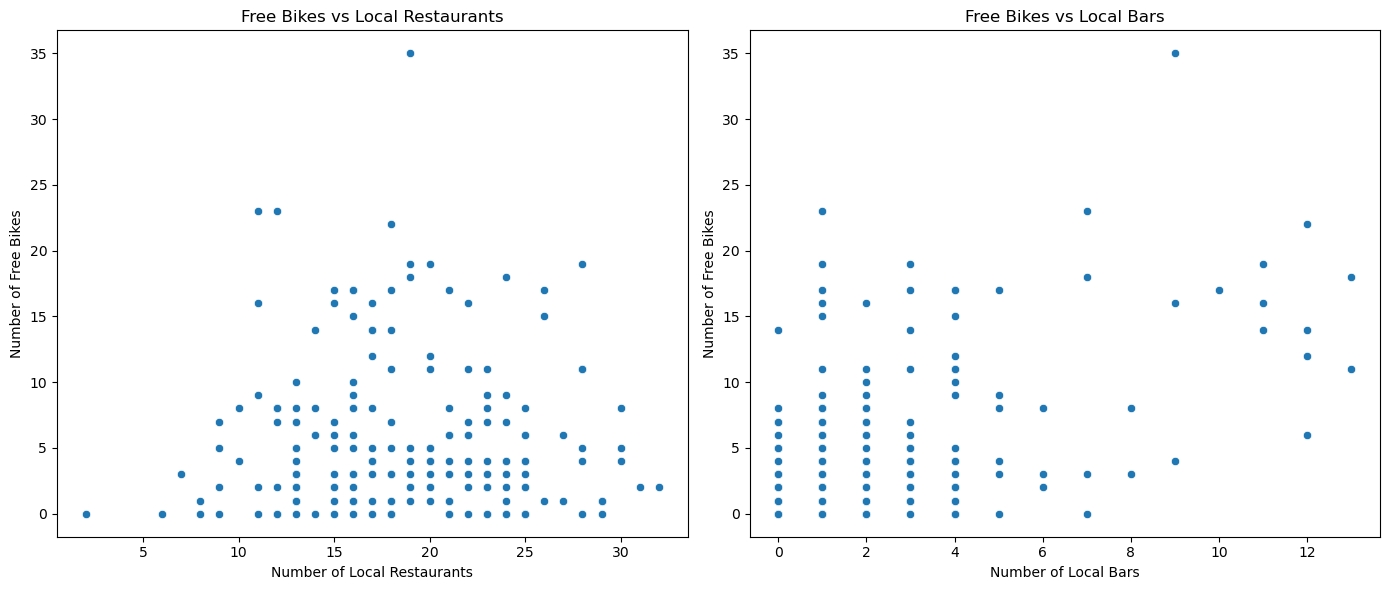

In [120]:
freebikes_figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Restaurants Vs Free Bikes
sns.scatterplot(
    data=EDA_bikestations,
    x='restaurant_count',
    y='free bikes',
    ax=axes[0]
)
axes[0].set_title('Free Bikes vs Local Restaurants')
axes[0].set_xlabel("Number of Local Restaurants")
axes[0].set_ylabel("Number of Free Bikes")

# Bars Vs Free Bikes
sns.scatterplot(
    data=EDA_bikestations,
    x='bar_count',
    y='free bikes',
    ax=axes[1]
)
axes[1].set_title('Free Bikes vs Local Bars')
axes[1].set_xlabel("Number of Local Bars")
axes[1].set_ylabel("Number of Free Bikes")

plt.tight_layout()

freebikes_attractions_subplot_fig = freebikes_figure

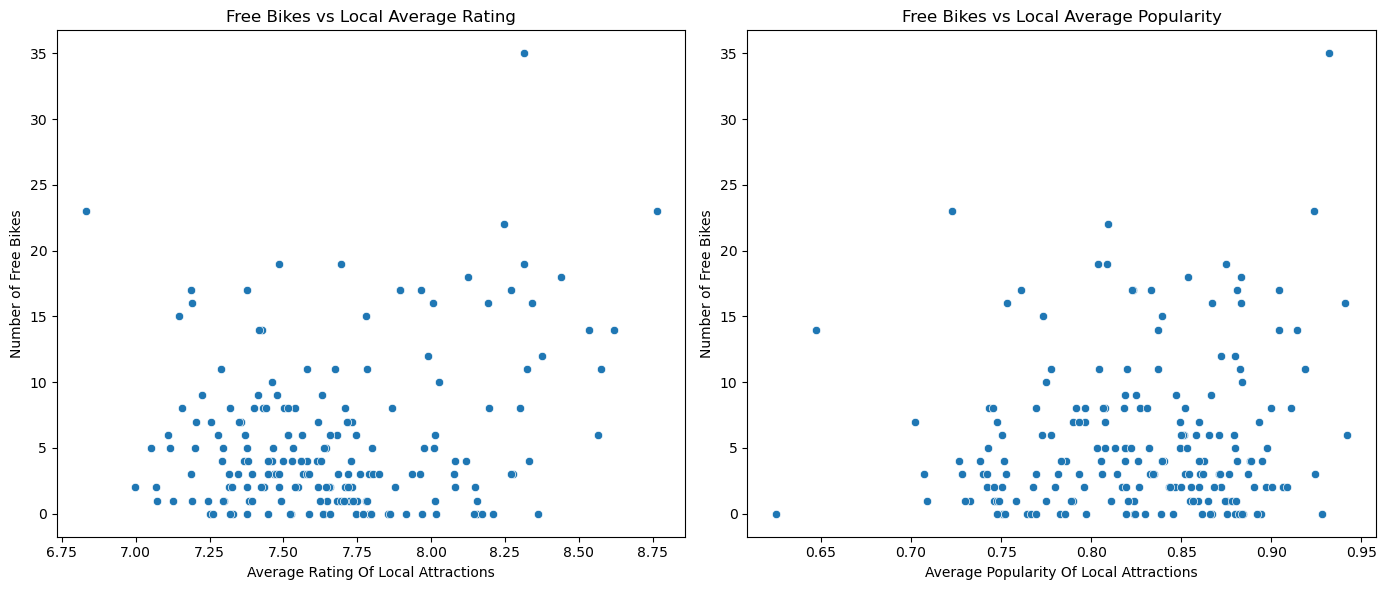

In [152]:
freebikes_local_ratings, axes = plt.subplots(nrows = 1, ncols=2, figsize=(14,6))

# Free Bikes Vs Average Local Ratings
sns.scatterplot(
    data=EDA_bikestations,
    x='average rating',
    y='free bikes',
    ax=axes[0]
)
axes[0].set_title('Free Bikes vs Local Average Rating')
axes[0].set_xlabel("Average Rating Of Local Attractions")
axes[0].set_ylabel("Number of Free Bikes")

# Free Bikes Vs Total Number Of Local Ratings
sns.scatterplot(
    data=EDA_bikestations,
    x='average popularity',
    y='free bikes',
    ax=axes[1]
)
axes[1].set_title('Free Bikes vs Local Average Popularity')
axes[1].set_xlabel("Average Popularity Of Local Attractions")
axes[1].set_ylabel("Number of Free Bikes")


plt.tight_layout()
freebikes_rating_fig = freebikes_local_ratings


# Additional Analysis

Acknowledging the FOURSQUARE_API Limitation of 50 locations per Bike_station's coordaintes, this selection bias for locations within a 1,000 metre radius for each bike station may skew findings. Bike_stations with large quantities of local locations are infringed upon, unable to provide all locations and subsequent dat; ratings, categories.

As a result, additional analysis to observe if Results-Response limitation of 50 location affected relationships

In [122]:
# 187 Bike Stations
# Affected by 50 location limitation reponse at distance of 1,000m
counts = station_POI['station_id'].value_counts()
stations_with_50 = counts[counts == 50]
len(stations_with_50)

187

In [123]:
# Distance threshold found at 298 metres
# No Bike Stations incur bias from reponse limitation of 50 locations

station_summary = station_POI[station_POI['distance'] < 298].groupby('station_id').agg(
    max_distance=('distance', 'max'),
    location_count=('station_id', 'count')
).reset_index()

station_summary.sort_values('location_count', ascending=False)


,station_id,max_distance,location_count
152,157,286,49
148,153,265,48
172,177,279,48
95,97,275,48
183,189,287,47
...,...,...,...
168,173,226,2
185,191,96,2
141,145,261,1
135,139,282,1


In [124]:
# Reproduce visualisation Pairplot to observe if distance threshold impacts relationships


# Filter dataframe for location with distance from Bike_station < 298 
bikestations_POI_298 = bikestations_POI[bikestations_POI['distance']< 298]

# Filter masks for categories values
restaurant_mask_298 = bikestations_POI_298['category'].str.contains('Restaurant', case=False, na=False)
bar_mask_298 = bikestations_POI_298['category'].str.contains('Bar', case=False, na=False)
cafe_mask_298 = bikestations_POI_298['category'].str.contains('Café', case=False, na=False)
bakery_mask_298 = bikestations_POI_298['category'].str.contains('Bakery', case=False, na=False)
coffee_mask_298 = bikestations_POI_298['category'].str.contains('Coffee', case=False, na=False)


# Apply masks
restaurant_counts_298 = bikestations_POI_298[restaurant_mask_298].groupby('station_id').size().rename('restaurant_count')
bar_counts_298 = bikestations_POI_298[bar_mask_298].groupby('station_id').size().rename('bar_count')
cafe_counts_298 = bikestations_POI_298[cafe_mask_298].groupby('station_id').size().rename('cafe_counts')
bakery_counts_298 = bikestations_POI_298[bakery_mask_298].groupby('station_id').size().rename('bakery_counts')
coffee_counts_298 = bikestations_POI_298[coffee_mask_298].groupby('station_id').size().rename('coffee_counts')


# Concatenate Series into Dataframe 
categories_counts_298 = pd.concat([restaurant_counts_298, bar_counts_298,cafe_counts_298,bakery_counts_298,coffee_counts_298], axis=1).fillna(0).astype(int)
categories_counts_298.reset_index(inplace=True)

# Observe new category values for each bike_station
categories_counts_298


,station_id,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts
0,0,1,0,0,0,1
1,1,1,0,0,0,1
2,2,5,0,0,2,0
3,3,2,0,2,0,1
4,4,9,0,2,2,1
...,...,...,...,...,...,...
176,149,0,0,2,0,0
177,173,0,0,1,0,0
178,191,0,0,1,0,0
179,41,0,0,0,1,0


In [125]:
# Create new Dataframe observing ratings of locations nearby each bike_station
EDA_bikestations_298 = bikestations_POI_298.groupby(['station_id', 'free bikes','empty slots','total slots']).agg({
    'rating': 'mean',
    'total num ratings': 'sum',
    'popularity':'mean'
}).reset_index()


# Concatenate Ratings_DF and Categories_DF for further analysis
EDA_bikestations_298 = pd.merge(EDA_bikestations_298, categories_counts_298,on='station_id',how='inner')

EDA_bikestations_298.rename(columns={
    'total slots':'total bike slots',
    'rating':'average rating',
    'total num ratings':'total ratings',
    'popularity':'average popularity'
    },
    inplace=True)

EDA_bikestations_298

,station_id,free bikes,empty slots,total bike slots,average rating,total ratings,average popularity,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts
0,0,0,32,32,7.750000,206.0,0.832688,1,0,0,0,1
1,1,0,23,23,7.533333,185.0,0.711452,1,0,0,0,1
2,2,7,26,33,7.700000,290.0,0.775019,5,0,0,2,0
3,3,8,6,14,7.433333,120.0,0.720962,2,0,2,0,1
4,4,6,17,23,7.240000,1477.0,0.749633,9,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
176,189,1,16,17,7.706383,5085.0,0.872900,21,1,5,4,1
177,190,12,18,30,7.677778,513.0,0.801814,2,1,0,1,0
178,191,1,40,41,NaN,0.0,0.219059,0,0,1,0,0
179,192,0,17,17,6.830000,314.0,0.712404,10,1,3,1,0


In [126]:

# Merge our EDA_bikestations DF and the cleaned DF with distance < 298
Comparative_table = pd.merge(EDA_bikestations,EDA_bikestations_298,on='station_id',how='left')

# 14 BikeStations have 0 locations within the distance of 298
Comparative_table.isnull().sum()
Comparative_table[Comparative_table.isnull().any(axis=1)]

,station_id,free bikes_x,empty slots_x,total bike slots_x,average rating_x,total ratings_x,average popularity_x,restaurant_count_x,bar_count_x,cafe_counts_x,...,empty slots_y,total bike slots_y,average rating_y,total ratings_y,average popularity_y,restaurant_count_y,bar_count_y,cafe_counts_y,bakery_counts_y,coffee_counts_y
17,17,0,23,23,7.525000,951.0,0.782896,9,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,31,11,4,15,8.324000,14440.0,0.882719,18,13,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,40,8,2,10,7.157143,956.0,0.743319,13,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,41,8,6,14,7.540741,1366.0,0.745346,10,0,7,...,6.0,14.0,NaN,0.0,0.557868,0.0,0.0,0.0,1.0,0.0
57,57,14,10,24,7.428571,1838.0,0.837316,17,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,2,13,15,7.732653,3052.0,0.872143,25,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,68,5,16,21,7.114815,1386.0,0.813186,9,1,5,...,16.0,21.0,NaN,0.0,0.697915,1.0,0.0,0.0,0.0,0.0
81,81,19,11,30,8.314000,10636.0,0.874659,19,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,112,2,15,17,7.423404,1968.0,0.843563,16,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,114,12,9,21,8.374000,10537.0,0.879730,20,12,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
print('EDA_bikestations_298 Shape')
print('')
print('Number Of Rows =',EDA_bikestations_298.shape)

EDA_bikestations_298 = EDA_bikestations_298.dropna()

print('No Nan Values Number Of Rows = ',EDA_bikestations_298.shape)

print('')
print('Comparative Cleaning EDA_Dataframes Distance < 298')
print('')
print('Number Of Bike Stations in EDA_bikestations = ',EDA_bikestations.shape)
print('Number Of Bike Stations in EDA_bikestations_298 = ',EDA_bikestations_298.shape)



EDA_bikestations_298 Shape

Number Of Rows = (181, 12)
No Nan Values Number Of Rows =  (176, 12)

Comparative Cleaning EDA_Dataframes Distance < 298

Number Of Bike Stations in EDA_bikestations =  (195, 12)
Number Of Bike Stations in EDA_bikestations_298 =  (176, 12)


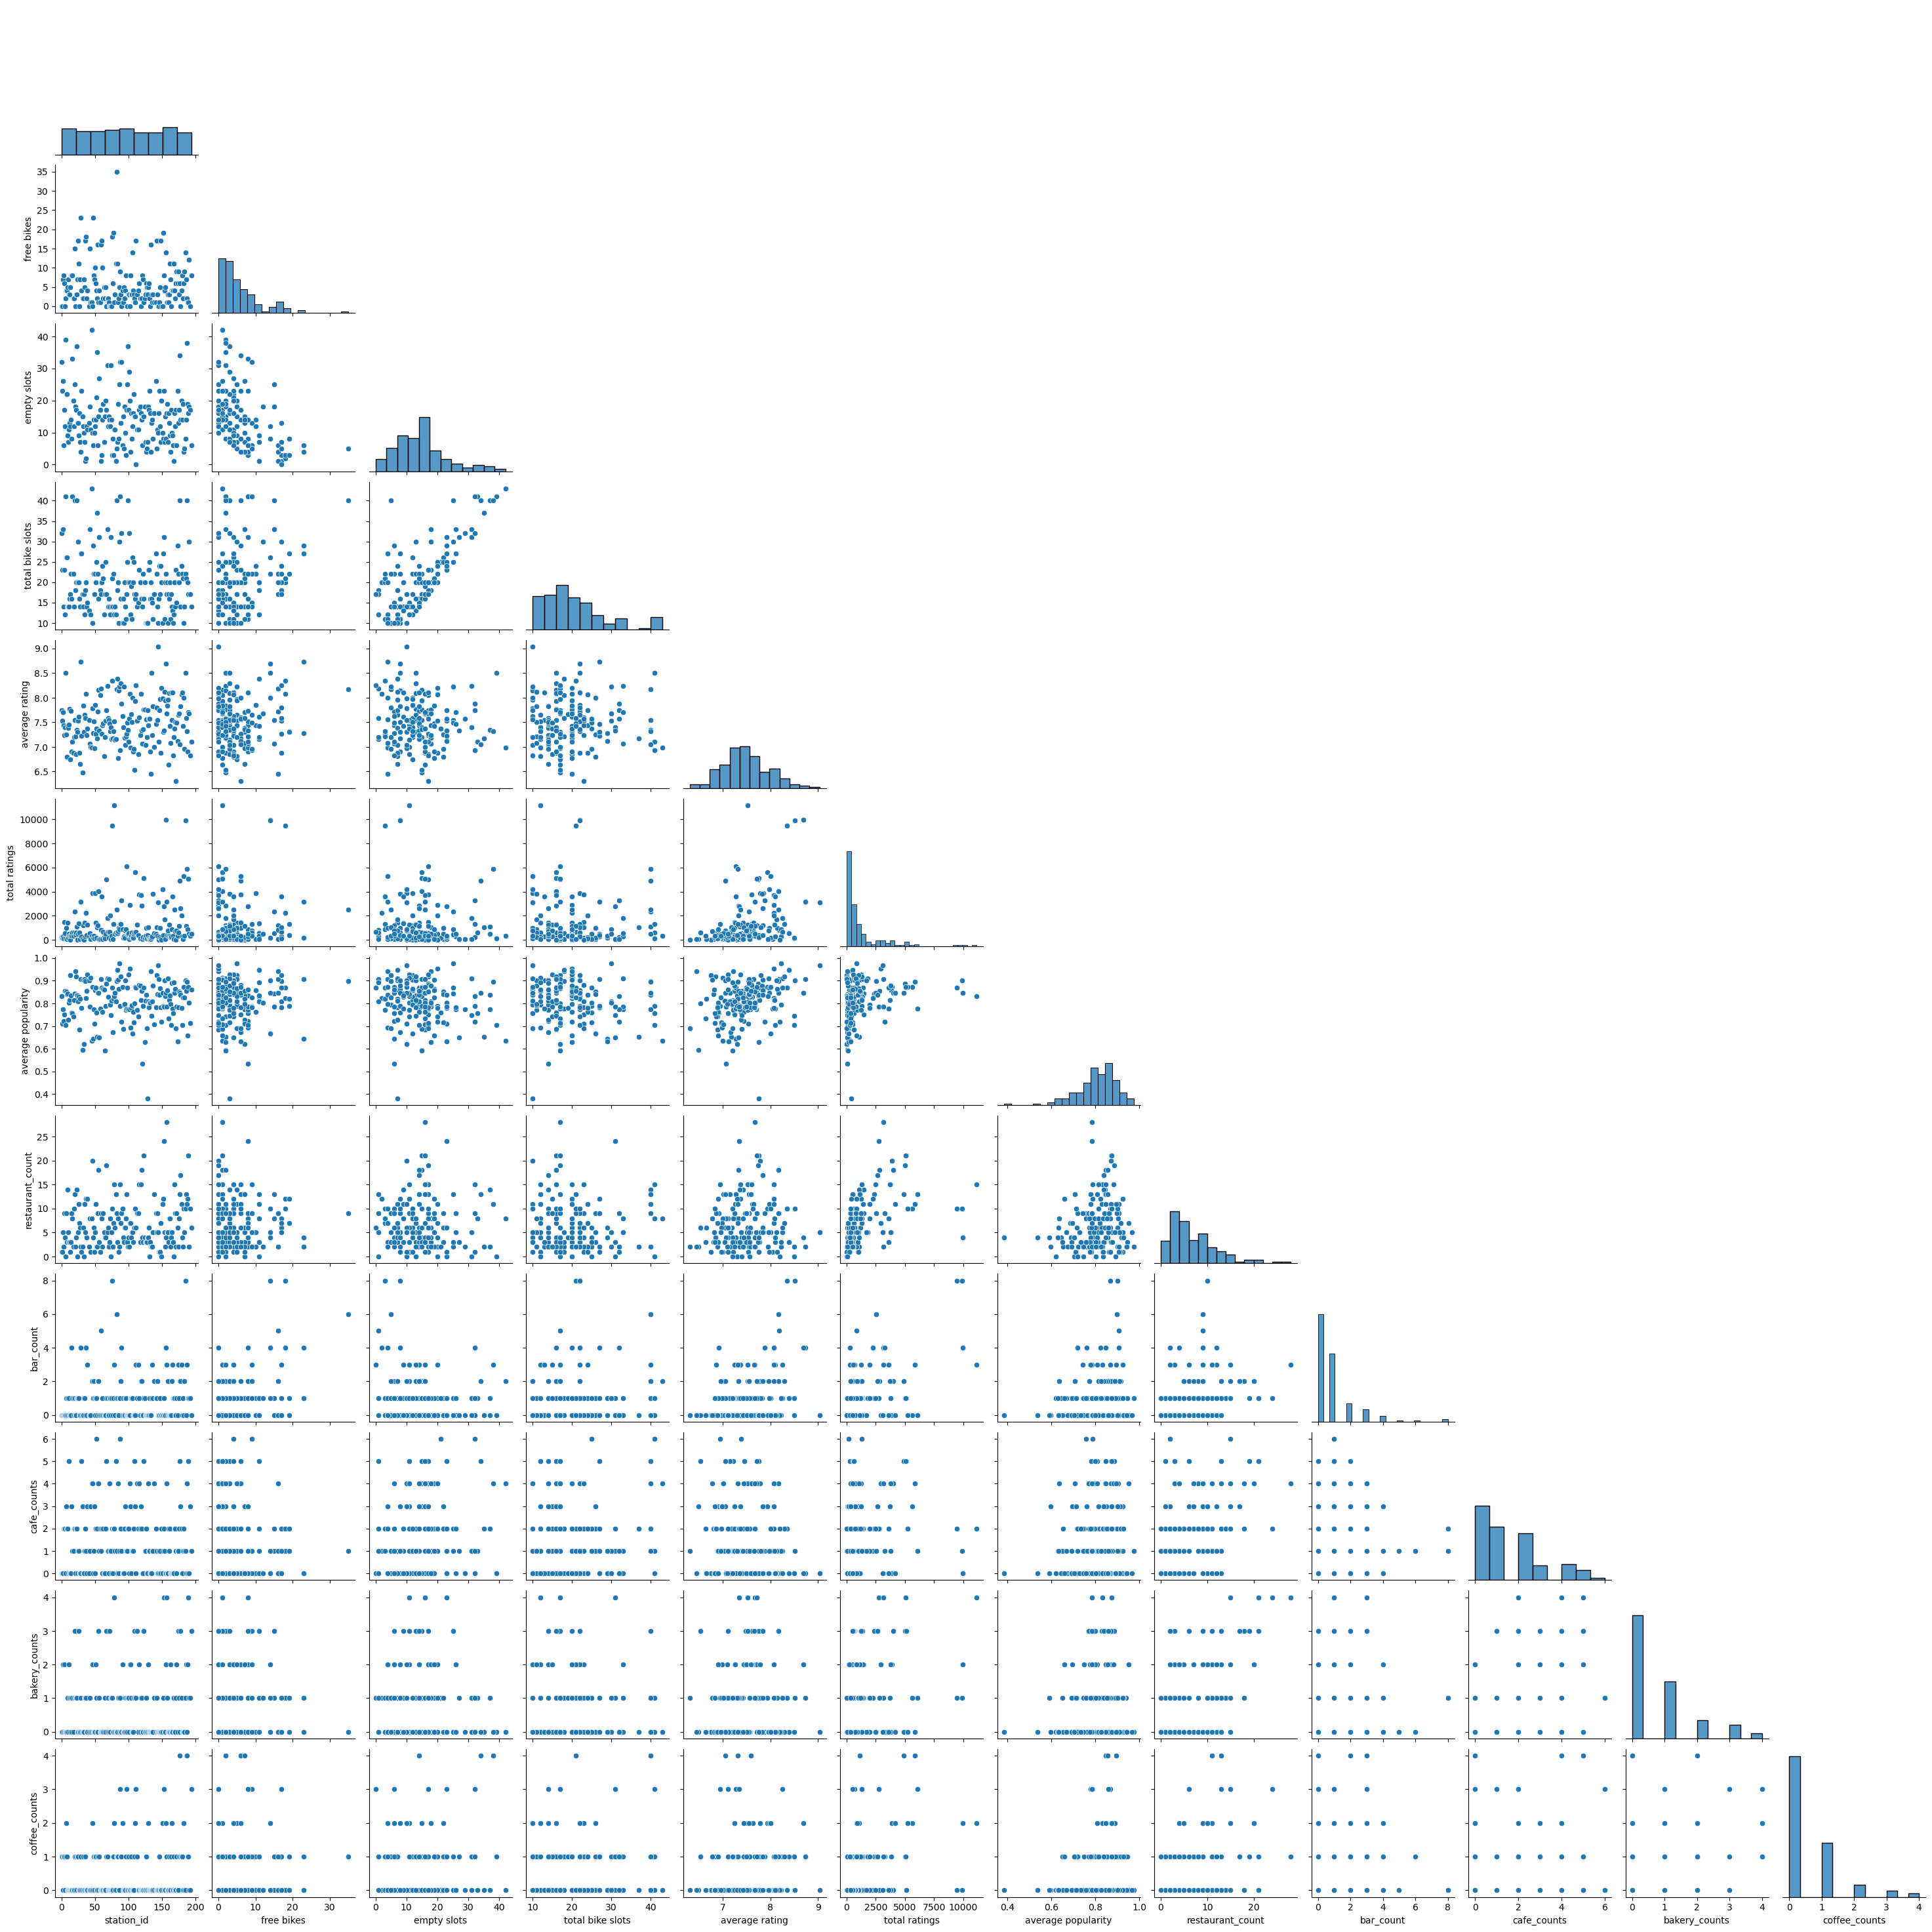

In [128]:
# CityBike Data relationships with FOURSQUARE Points_Of_Interest In Lisbon City, Portugal
# Distance of Location < 298

# Seaborn's Pairplot
sns.pairplot(EDA_bikestations_298,corner=True)
plt.show()

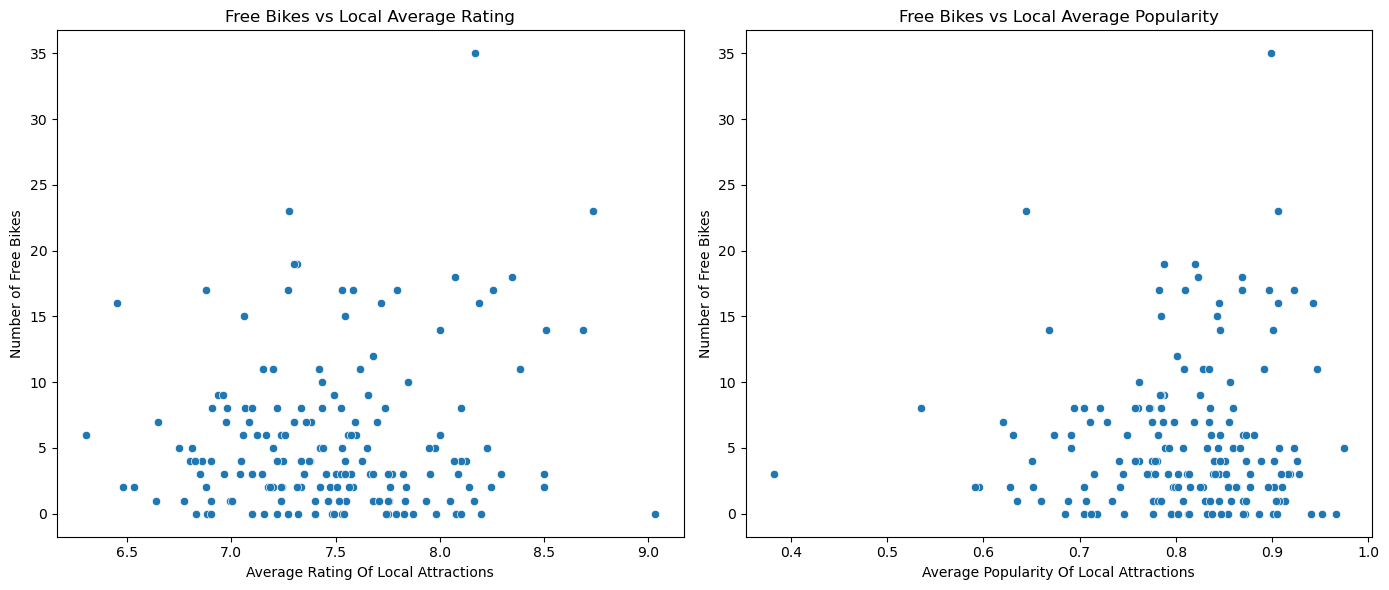

In [153]:
# Data Visualisation With Cleaned Dataframe

freebikes_local_ratings, axes = plt.subplots(nrows = 1, ncols=2, figsize=(14,6))

# Free Bikes Vs Average Local Ratings
sns.scatterplot(
    data=EDA_bikestations_298,
    x='average rating',
    y='free bikes',
    ax=axes[0]
)
axes[0].set_title('Free Bikes vs Local Average Rating')
axes[0].set_xlabel("Average Rating Of Local Attractions")
axes[0].set_ylabel("Number of Free Bikes")

# Free Bikes Vs Total Number Of Local Ratings
sns.scatterplot(
    data=EDA_bikestations_298,
    x='average popularity',
    y='free bikes',
    ax=axes[1]
)
axes[1].set_title('Free Bikes vs Local Average Popularity')
axes[1].set_xlabel("Average Popularity Of Local Attractions")
axes[1].set_ylabel("Number of Free Bikes")


plt.tight_layout()
freebikes_rating_fig = freebikes_local_ratings


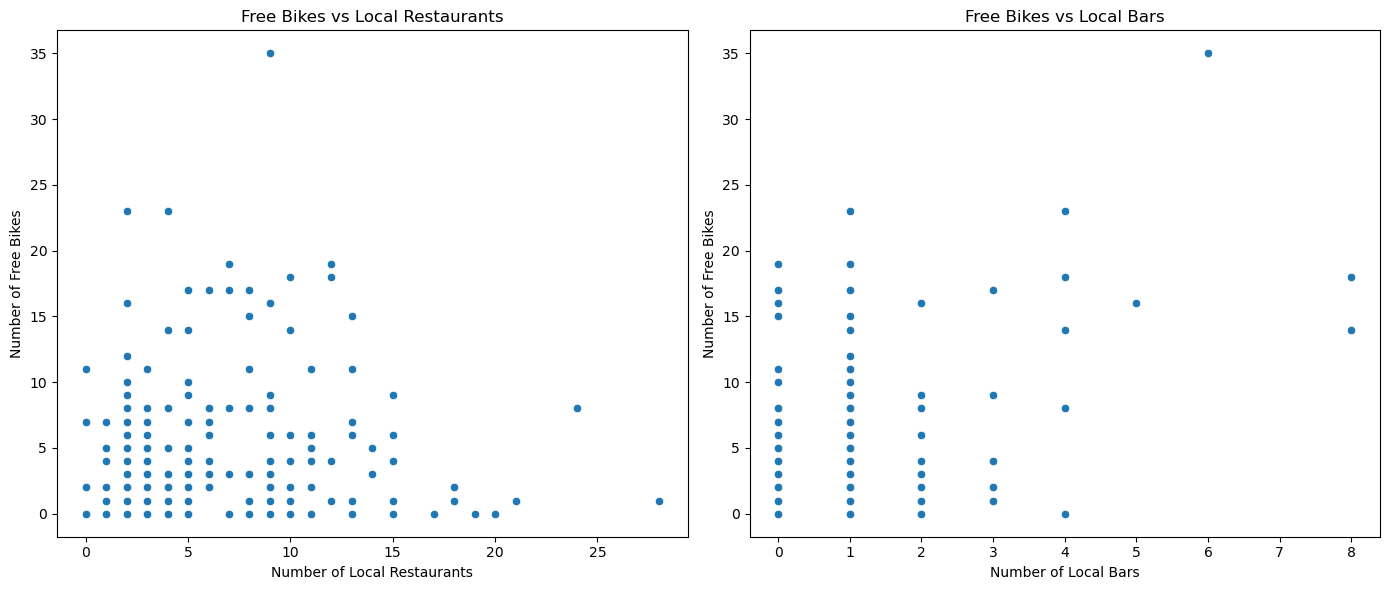

In [130]:
# Data Visualisation With Cleaned Dataframe

freebikes_figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Restaurants Vs Free Bikes
sns.scatterplot(
    data=EDA_bikestations_298,
    x='restaurant_count',
    y='free bikes',
    ax=axes[0]
)
axes[0].set_title('Free Bikes vs Local Restaurants')
axes[0].set_xlabel("Number of Local Restaurants")
axes[0].set_ylabel("Number of Free Bikes")

# Bars Vs Free Bikes
sns.scatterplot(
    data=EDA_bikestations_298,
    x='bar_count',
    y='free bikes',
    ax=axes[1]
)
axes[1].set_title('Free Bikes vs Local Bars')
axes[1].set_xlabel("Number of Local Bars")
axes[1].set_ylabel("Number of Free Bikes")

plt.tight_layout()

freebikes_attractions_subplot_fig = freebikes_figure

## Selection Bias Conclusion

After filter Locations for each Bike Station for distances < 298, the PairPlot shows no obvious visual change in relationships of bikes vs ratings and category values.

Therefore, while Selection Bias remains present for Bike_stations with > 50 locations within a 1,000 metre radius, this bias show no visual sign of influencing analysis of bikes vs locations. However, we will therefore proceed with the cleaned dataset (EDA_bikestations_298) for all further analysis and modelling.

In [155]:
# Download CSV File
EDA_bikestations_298.to_csv('../data/EDA_bikestations_298.csv', index=False, header=True, sep=',')

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [132]:
import sqlite3

### Tables to create

- bike stations
- bike availability
- local locations
- location categories

#

In [133]:
# Create SQL Database
connection = sqlite3.connect('/Users/mitchellpalmer/Projects/Lighthouse Lab Projects/Data_Statistical_Modeling/Statistical_Modeling_Project/Statistical-Modelling-Project./data/citybikes_lisbon.db')
cursor = connection.cursor()

In [134]:
# Create Dataframe Copy 
lb_citybikes_stations = lb_citybikes.copy()

# Produce bike_stations Dataframe
lb_citybikes_stations.drop(columns=['free bikes','empty slots','total slots','timestamp'], inplace=True)
lb_citybikes_stations = lb_citybikes_stations[[
    'station_id',
    'latitude',
    'longitude'
]]
lb_citybikes_stations

,station_id,latitude,longitude
0,0,38.753590,-9.157170
1,1,38.752310,-9.158850
2,2,38.770657,-9.160248
3,3,38.780690,-9.096220
4,4,38.702936,-9.175234
...,...,...,...
190,190,38.729724,-9.157531
191,191,38.711498,-9.194361
192,192,38.739395,-9.162447
193,193,38.708780,-9.137125


In [135]:
# Create bike_stations SQL Table
lb_citybikes_stations.to_sql('bike_stations', con=connection, index=False, if_exists='replace')

195

In [136]:
# Create Dataframe Copy 
lb_citybikes_availability = lb_citybikes.copy()

# Produce bike_availability Dataframe
lb_citybikes_availability.drop(columns=['latitude','longitude'], inplace=True)
lb_citybikes_availability = lb_citybikes_availability[[
    'station_id',
    'total slots',
    'free bikes',
    'empty slots',
    'timestamp'
]]

lb_citybikes_availability

,station_id,total slots,free bikes,empty slots,timestamp
0,0,32,0,32,2025-07-26T23:39:44.571202+00:00Z
1,1,23,0,23,2025-07-26T23:39:44.571444+00:00Z
2,2,33,7,26,2025-07-26T23:39:44.570809+00:00Z
3,3,14,8,6,2025-07-26T23:39:44.570706+00:00Z
4,4,23,6,17,2025-07-26T23:39:44.571010+00:00Z
...,...,...,...,...,...
190,190,30,12,18,2025-07-26T23:39:44.571251+00:00Z
191,191,41,1,40,2025-07-26T23:39:44.570595+00:00Z
192,192,17,0,17,2025-07-26T23:39:44.571255+00:00Z
193,193,20,16,4,2025-07-26T23:39:44.571246+00:00Z


In [137]:
# Create bike_availability SQL Table
lb_citybikes_availability.to_sql('bike_availability', con=connection, index=False, if_exists='replace')

195

In [138]:
# Create Primary Key for Point_Of_Interest via Index
station_POI['interest_id'] = station_POI.index
station_POI

,name,rating,total num ratings,popularity,distance,veracity,category,station_id,interest_id
0,Torre Do Tombo,8.4,21,0.943785,124,4,"Government Building, Library",0,0
1,Aula Magna,8.5,127,0.986900,138,4,Concert Hall,0,1
2,Alameda da Universidade,7.9,47,0.937355,121,4,"Plaza, Garden",0,2
3,Letras Bar,6.2,11,0.659332,87,3,Portuguese Restaurant,0,3
4,Horto do Campo Grande,8.2,40,0.959301,337,5,Flower Store,0,4
...,...,...,...,...,...,...,...,...,...
9657,Pastelaria Florida,5.6,12,0.953423,257,4,Coffee Shop,194,9657
9658,Continente Bom Dia Acqua Roma,7.6,17,0.888488,506,5,"Supermarket, Bakery",194,9658
9659,Café Império,7.4,255,0.971016,502,5,Portuguese Restaurant,194,9659
9660,Quiosque da Alameda,6.6,26,0.968459,404,5,"Café, Cafeteria",194,9660


In [ ]:
# 698 unique category values
station_POI['category'].value_counts().sort_values()

# Potential to clean categories once in dataframe by common keyvalues

category
Café, Wine Bar                            1
Deli, Coffee Shop, Bakery                 1
Night Club, Lounge, Sushi Restaurant      1
Culinary School                           1
Italian Restaurant, Breakfast Spot        1
                                       ... 
Coffee Shop                             171
Bakery                                  303
Café                                    495
Restaurant                              577
Portuguese Restaurant                   945
Name: count, Length: 698, dtype: int64

In [140]:
# Create Interest Category Dataframe using raw category value entries
category_POI = station_POI['category']
category_POI = category_POI.value_counts().sort_values(ascending=False)
category_POI = pd.DataFrame(category_POI).reset_index()
category_POI['category_id'] = category_POI.index
category_POI= category_POI.drop(columns=['count'])
category_POI = category_POI[[
    'category_id',
    'category'
]]
category_POI

,category_id,category
0,0,Portuguese Restaurant
1,1,Restaurant
2,2,Café
3,3,Bakery
4,4,Coffee Shop
...,...,...
693,693,"Italian Restaurant, Breakfast Spot"
694,694,Culinary School
695,695,"Night Club, Lounge, Sushi Restaurant"
696,696,"Deli, Coffee Shop, Bakery"


In [141]:
# Create Location_Category SQL Table
category_POI.to_sql('location_category', con=connection, index=False,if_exists='replace')

698

In [142]:
# Create Locations Dataframe
locations_POI = pd.merge(station_POI,category_POI,on='category',how='inner')
locations_POI = locations_POI.drop(columns=['category'])
locations_POI = locations_POI.rename(columns={'distance':'metres_from_station'})
locations_POI = locations_POI.rename(columns={'total num ratings':'total ratings'})
locations_POI = locations_POI.rename(columns={'interest_id':'location_id'})

locations_POI = locations_POI[[
    'location_id',
    'name',
    'rating',
    'total ratings',
    'popularity',
    'metres_from_station',
    'veracity',
    'station_id',
    'category_id'
    
]]
locations_POI

,location_id,name,rating,total ratings,popularity,metres_from_station,veracity,station_id,category_id
0,0,Torre Do Tombo,8.4,21,0.943785,124,4,0,152
1,1,Aula Magna,8.5,127,0.986900,138,4,0,122
2,2,Alameda da Universidade,7.9,47,0.937355,121,4,0,89
3,3,Letras Bar,6.2,11,0.659332,87,3,0,0
4,4,Horto do Campo Grande,8.2,40,0.959301,337,5,0,57
...,...,...,...,...,...,...,...,...,...
9639,9657,Pastelaria Florida,5.6,12,0.953423,257,4,194,4
9640,9658,Continente Bom Dia Acqua Roma,7.6,17,0.888488,506,5,194,263
9641,9659,Café Império,7.4,255,0.971016,502,5,194,0
9642,9660,Quiosque da Alameda,6.6,26,0.968459,404,5,194,303


In [143]:
# Create Locations SQL Table
locations_POI.to_sql('local_locations', con=connection, index=False,if_exists='replace')

9644

Look at the data before and after the join to validate your data.

In [ ]:
# View All Tables
query = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", connection
                    )

query

,name
0,bike_stations
1,bike_availability
2,location_category
3,local_locations


In [163]:
# Unable to create KEYS with .so_sql() method
query = pd.read_sql("PRAGMA foreign_key_list(local_locations);", connection
                    )

query

,id,seq,table,from,to,on_update,on_delete,match


In [144]:
# Two tables prior to join

#1 
station_POI


,name,rating,total num ratings,popularity,distance,veracity,category,station_id,interest_id
0,Torre Do Tombo,8.4,21,0.943785,124,4,"Government Building, Library",0,0
1,Aula Magna,8.5,127,0.986900,138,4,Concert Hall,0,1
2,Alameda da Universidade,7.9,47,0.937355,121,4,"Plaza, Garden",0,2
3,Letras Bar,6.2,11,0.659332,87,3,Portuguese Restaurant,0,3
4,Horto do Campo Grande,8.2,40,0.959301,337,5,Flower Store,0,4
...,...,...,...,...,...,...,...,...,...
9657,Pastelaria Florida,5.6,12,0.953423,257,4,Coffee Shop,194,9657
9658,Continente Bom Dia Acqua Roma,7.6,17,0.888488,506,5,"Supermarket, Bakery",194,9658
9659,Café Império,7.4,255,0.971016,502,5,Portuguese Restaurant,194,9659
9660,Quiosque da Alameda,6.6,26,0.968459,404,5,"Café, Cafeteria",194,9660


In [145]:
#2
lb_citybikes

,latitude,longitude,timestamp,free bikes,empty slots,total slots,station_id
0,38.753590,-9.157170,2025-07-26T23:39:44.571202+00:00Z,0,32,32,0
1,38.752310,-9.158850,2025-07-26T23:39:44.571444+00:00Z,0,23,23,1
2,38.770657,-9.160248,2025-07-26T23:39:44.570809+00:00Z,7,26,33,2
3,38.780690,-9.096220,2025-07-26T23:39:44.570706+00:00Z,8,6,14,3
4,38.702936,-9.175234,2025-07-26T23:39:44.571010+00:00Z,6,17,23,4
...,...,...,...,...,...,...,...
190,38.729724,-9.157531,2025-07-26T23:39:44.571251+00:00Z,12,18,30,190
191,38.711498,-9.194361,2025-07-26T23:39:44.570595+00:00Z,1,40,41,191
192,38.739395,-9.162447,2025-07-26T23:39:44.571255+00:00Z,0,17,17,192
193,38.708780,-9.137125,2025-07-26T23:39:44.571246+00:00Z,16,4,20,193


In [146]:
# JOINED Table for analysis

# Observing bike counts, ratings and category counts for station
EDA_bikestations

,station_id,free bikes,empty slots,total bike slots,average rating,total ratings,average popularity,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts
0,0,0,32,32,7.585366,2772.0,0.823715,18,1,8,2,2
1,1,0,23,23,7.744444,1808.0,0.750702,18,1,6,0,2
2,2,7,26,33,7.354545,1134.0,0.807498,18,0,4,4,1
3,3,8,6,14,7.709375,1669.0,0.807738,12,1,4,2,3
4,4,6,17,23,7.516000,6061.0,0.777604,21,3,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,12,18,30,7.988000,7211.0,0.872005,17,4,3,3,1
191,191,1,40,41,7.706250,774.0,0.730178,13,0,1,1,2
192,192,0,17,17,7.446341,3428.0,0.769418,24,3,3,2,1
193,193,16,4,20,8.192000,13673.0,0.940997,17,9,2,2,2


In [147]:
EDA_bikestations_298

,station_id,free bikes,empty slots,total bike slots,average rating,total ratings,average popularity,restaurant_count,bar_count,cafe_counts,bakery_counts,coffee_counts
0,0,0,32,32,7.750000,206.0,0.832688,1,0,0,0,1
1,1,0,23,23,7.533333,185.0,0.711452,1,0,0,0,1
2,2,7,26,33,7.700000,290.0,0.775019,5,0,0,2,0
3,3,8,6,14,7.433333,120.0,0.720962,2,0,2,0,1
4,4,6,17,23,7.240000,1477.0,0.749633,9,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
175,188,1,19,20,6.900000,858.0,0.659510,12,1,0,2,1
176,189,1,16,17,7.706383,5085.0,0.872900,21,1,5,4,1
177,190,12,18,30,7.677778,513.0,0.801814,2,1,0,1,0
179,192,0,17,17,6.830000,314.0,0.712404,10,1,3,1,0
